In [ ]:
pip install numpy


In [ ]:
pip install pandas

In [ ]:
pip install matplotlib

In [ ]:

pip install nltk


In [ ]:

pip install nltk


In [ ]:
pip install scikit-learn


In [ ]:
pip install seaborn

In [40]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [41]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [42]:
# printing the stopwords in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [43]:
# loading the dataset to a pandas DataFrame
news_dataset = pd.read_csv('train.csv')

In [44]:
news_dataset.shape


(20800, 5)

In [45]:
news_dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


C:\Users\hp\AppData\Local\Temp\ipykernel_2932\1529447720.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data = news_dataset, palette = 'mako',saturation = 1)


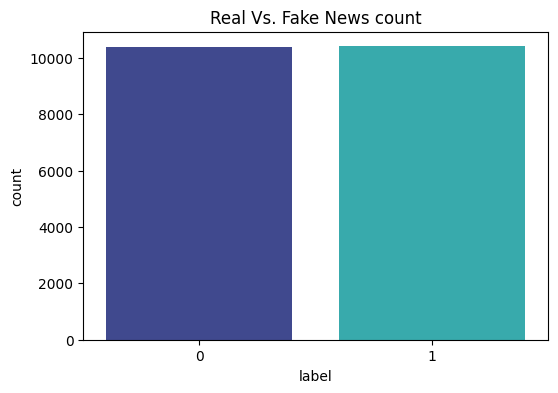

In [46]:
plt.figure(figsize = (6,4))
sns.countplot(x='label', data = news_dataset, palette = 'mako',saturation = 1)
plt.title("Real Vs. Fake News count", fontsize = 12)
plt.show()

In [47]:
# counting the number of missing values in the dataset
news_dataset.isnull().sum()


id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [48]:
# replacing the null values with empty string
news_dataset = news_dataset.fillna('')


In [49]:
# merging the author name and news title
news_dataset['content'] = news_dataset['author']+' '+news_dataset['title']
print(news_dataset['content'])

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object


In [50]:
# separating the data & label
news_dataset = news_dataset.sample(n=500)
X = news_dataset.drop(columns='label', axis=1)
Y = news_dataset['label']
print(X)
print(Y)

          id                                              title  \
7007    7007  Poll: 56 Percent of Democrats Want All of Trum...   
10115  10115  FBI reopens Hillary investigation – with evide...   
20709  20709  Car Thief Leads Police on Slow-Speed Chase Bec...   
10271  10271  Homeless Man Allegedly Broke into 4 Houses of ...   
7389    7389           Hillary’s Silent Plan to Destroy America   
...      ...                                                ...   
3639    3639  California State Senate Leader: ’Half My Famil...   
5273    5273  Republican Leader Now Proposes Taking Away Sen...   
1892    1892  Shocking! Nostradamus Predicted Donald Trump's...   
4238    4238  Peter Thiel: Globalization is Over, ’It Feels ...   
10819  10819  UKIP urge government to ‘do something’ about t...   

                                        author  \
7007                              Katie McHugh   
10115                                J.E. Dyer   
20709                       Warner Todd Husto

In [51]:
port_stem = PorterStemmer()


In [52]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content


In [53]:
news_dataset['content'] = news_dataset['content'].apply(stemming)
print(news_dataset['content'])

7007     kati mchugh poll percent democrat want trump n...
10115    j e dyer fbi reopen hillari investig evid anth...
20709    warner todd huston car thief lead polic slow s...
10271    katherin rodriguez homeless man allegedli brok...
7389         dave hodg hillari silent plan destroy america
                               ...                        
3639     assemblyman tim donnelli california state sena...
5273     republican leader propos take away senior heal...
1892     arnold monteverd norepli blogger com shock nos...
4238     charli nash peter thiel global feel date breit...
10819          throngsman ukip urg govern someth supermoon
Name: content, Length: 500, dtype: object


In [54]:
#separating the data and label
X = news_dataset['content'].values
Y = news_dataset['label'].values
print(X)

['kati mchugh poll percent democrat want trump nomine block breitbart'
 'j e dyer fbi reopen hillari investig evid anthoni weiner sext scandal'
 'warner todd huston car thief lead polic slow speed chase drive stick shift'
 'katherin rodriguez homeless man allegedli broke hous worship get back god breitbart'
 'dave hodg hillari silent plan destroy america'
 'joe nocera navi open back door come athlet victori new york time'
 'virgil virgil donald trump vs main stream media presid elect beat press combat come'
 'alan blinder orlando gunman shot least time autopsi find new york time'
 'activist post cop fire tear ga water protector attempt reclaim sacr land'
 'katherin rodriguez joy villa design grammi support presid'
 'john schwartz jennif steinhauer eric lipton ron nixon trump meet al gore climat chang hous g p rebuff tariff plan new york time'
 'doug p insan watch care architect jonathan gruber explain cost freedom'
 'hillari plan escap trump win billion money transfer qatar'
 'tim aran

In [55]:
print(Y)


[0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0
 1 0 0 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 0 0 0 1 0 1 1 1 1 0 1 1 1 1 0 0 1 0
 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 0
 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 1 1 1 0 1 0 0 0 1 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1
 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0
 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 1 0
 0 1 1 0 0 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1
 0 0 0 0 1 0 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 0
 1 0 0 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1
 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0
 0 1 1 0 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0
 1 1 0 1 1 0 0 1 0 1 1 1 

In [56]:
Y.shape


(500,)

In [57]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)
print(X)
news_dataset.shape

  (np.int32(0), np.int32(237))	0.36463711925421977
  (np.int32(0), np.int32(272))	0.19236874767888432
  (np.int32(0), np.int32(571))	0.3141375175163407
  (np.int32(0), np.int32(1206))	0.33419152064749424
  (np.int32(0), np.int32(1403))	0.36463711925421977
  (np.int32(0), np.int32(1556))	0.36463711925421977
  (np.int32(0), np.int32(1674))	0.347491047293996
  (np.int32(0), np.int32(1715))	0.33419152064749424
  (np.int32(0), np.int32(2338))	0.1660351770799382
  (np.int32(0), np.int32(2427))	0.3061789441948395
  (np.int32(1), np.int32(97))	0.317716432311322
  (np.int32(1), np.int32(662))	0.33339335076368876
  (np.int32(1), np.int32(742))	0.3554887263319983
  (np.int32(1), np.int32(780))	0.26778417563704415
  (np.int32(1), np.int32(1022))	0.206129660680592
  (np.int32(1), np.int32(1115))	0.317716432311322
  (np.int32(1), np.int32(1860))	0.3554887263319983
  (np.int32(1), np.int32(1974))	0.287220784816322
  (np.int32(1), np.int32(2027))	0.3554887263319983
  (np.int32(1), np.int32(2448))	0.33

(500, 6)

In [58]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)
print(Y_test)

[1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0
 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0
 1 1 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1]


In [59]:
decision_tree = DecisionTreeClassifier()

In [60]:
dt=decision_tree.fit(X_train,Y_train)
y_pred = dt.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy Score: {}".format(accuracy))
print('Classification Report:\n', classification_report(Y_test,y_pred,digits=5))

Accuracy Score: 0.91
Classification Report:
               precision    recall  f1-score   support

           0    0.95455   0.85714   0.90323        49
           1    0.87500   0.96078   0.91589        51

    accuracy                        0.91000       100
   macro avg    0.91477   0.90896   0.90956       100
weighted avg    0.91398   0.91000   0.90968       100



Prediction System on Testing Data

In [64]:
X_new = X_test[1]

prediction = dt.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

[0]
The news is Real


Manual Testing

In [62]:
def manual_DT_prediction():
    # Taking input of any news in form of text
    X = input("ENTER A NEWS FOR PREDICTION: ")
    # Apply stemming to the input text
    X_new = stemming(X)

    # Vectorize the stemmed textvectorizer.fit(X)
    X = vectorizer.transform([X_new])
    X = X.toarray()
    
    # Make the prediction
    prediction = dt.predict(X)
    if (prediction==0):
     print('The news is Real '+prediction)
    else:
     print('The news is Fake',prediction)

# Example usage
manual_DT_prediction()

The news is Fake [1]
